# Ecommerce Customer's (Linear Regression Project)

Let's soppose! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started !

## Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [8]:
customers = pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [9]:
customers

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [10]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
# describe the customers DataFrame
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis (EDA)

**Let's explore the data!**

For the rest of the project we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

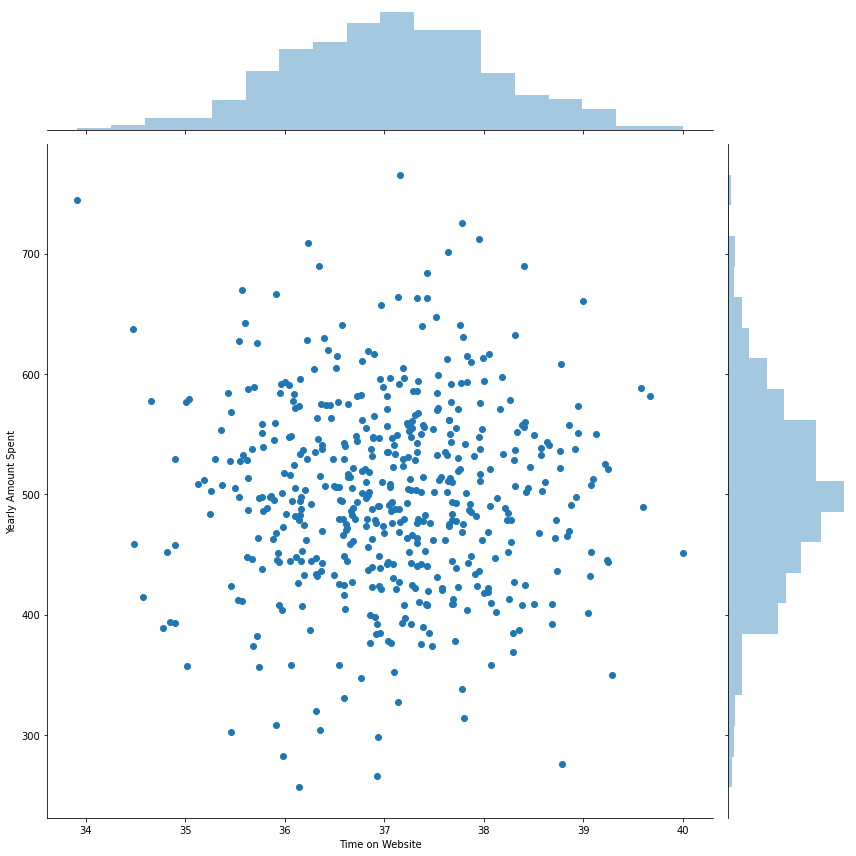

In [15]:
sns.jointplot(data= customers, x='Time on Website', y='Yearly Amount Spent', height=12, ratio=5)
plt.tight_layout()

** Do the same but with the Time on App column instead. **

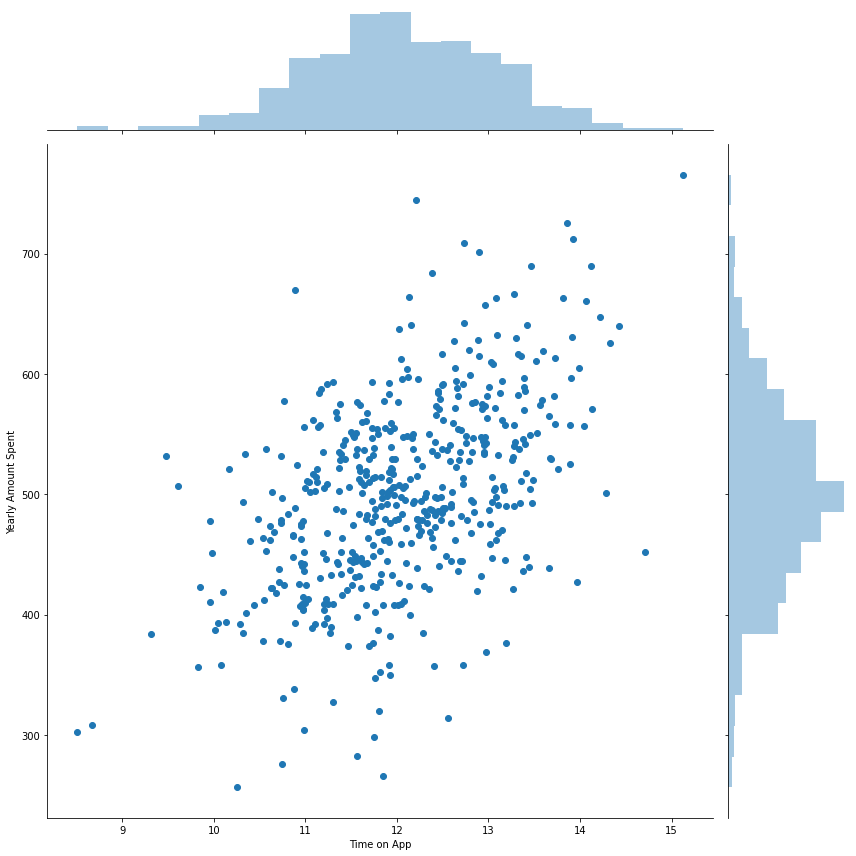

In [16]:
sns.jointplot(data= customers, x='Time on App', y='Yearly Amount Spent', height=12, ratio=5)
plt.tight_layout()

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

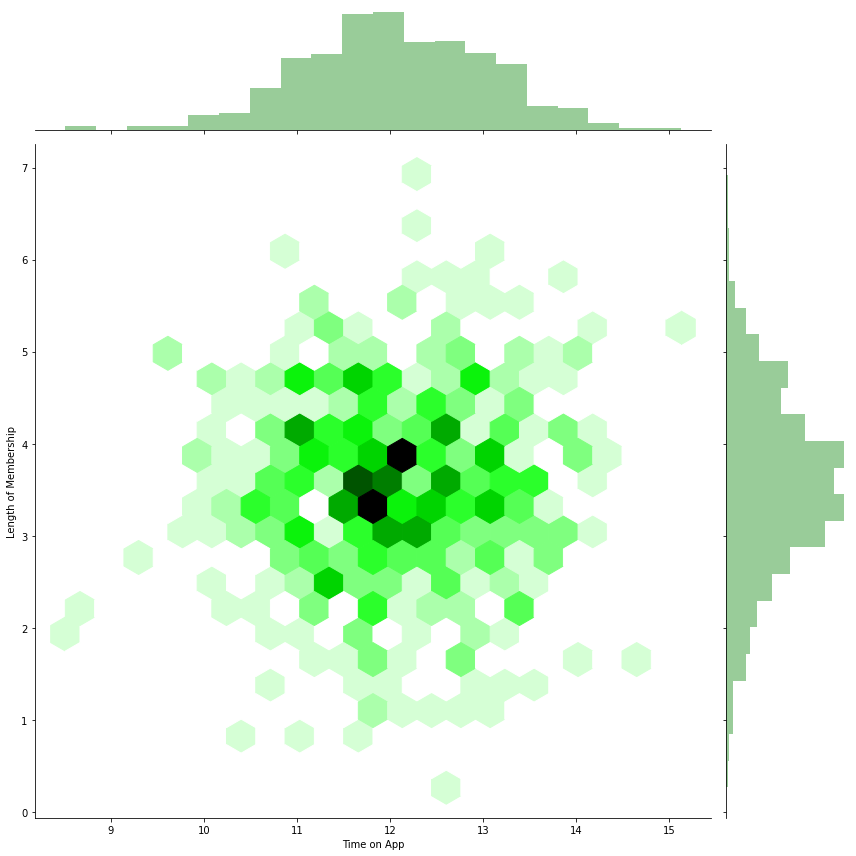

In [25]:
sns.jointplot(data= customers, x='Time on App', y='Length of Membership', color='green', kind='hex', height=12, ratio=5)
plt.tight_layout()

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

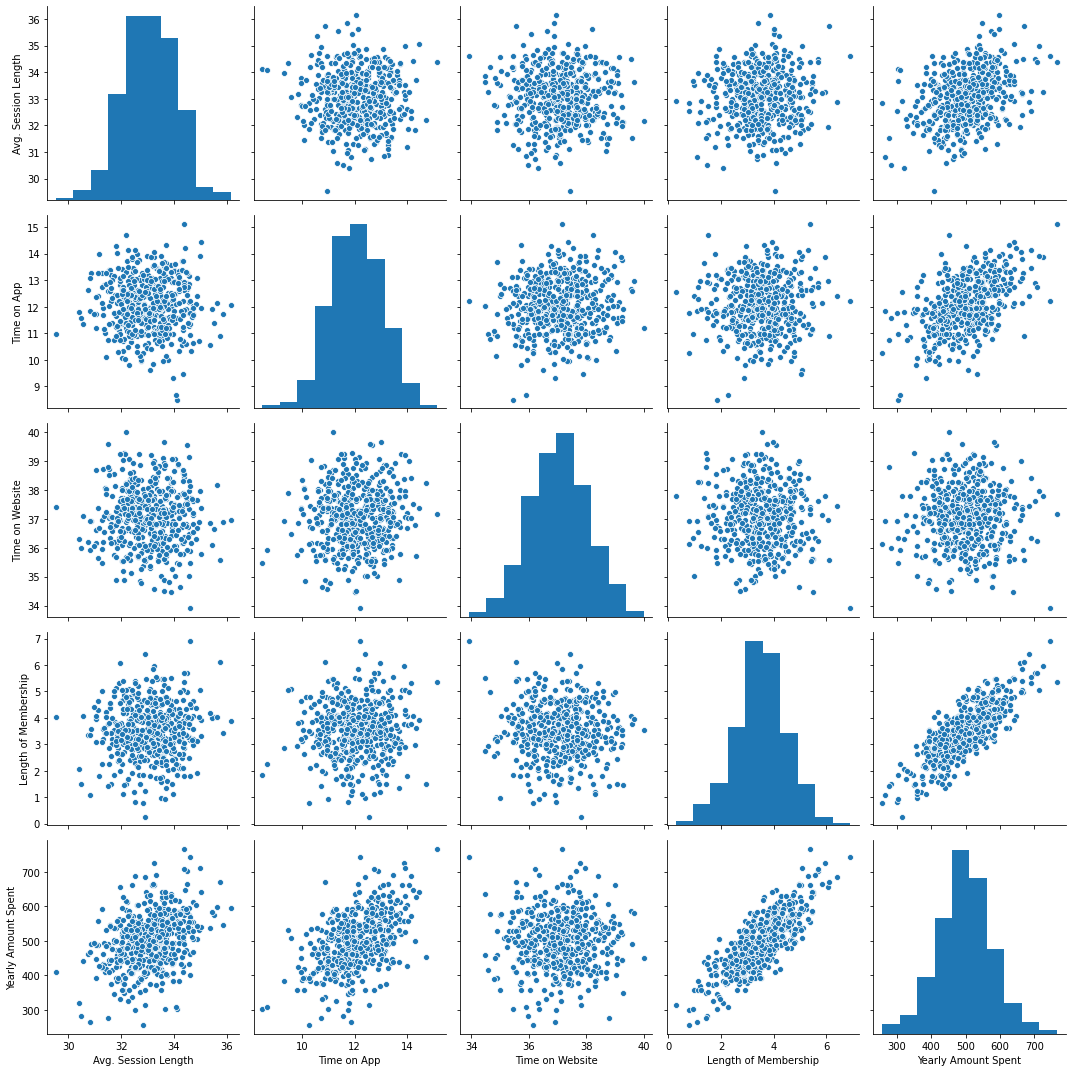

In [29]:
sns.pairplot(customers, height=3)
plt.tight_layout()

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

**Based of the above plot we can say that, 'Length of Membership' is highly correlated with 'Yearly Amount Spent'**

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

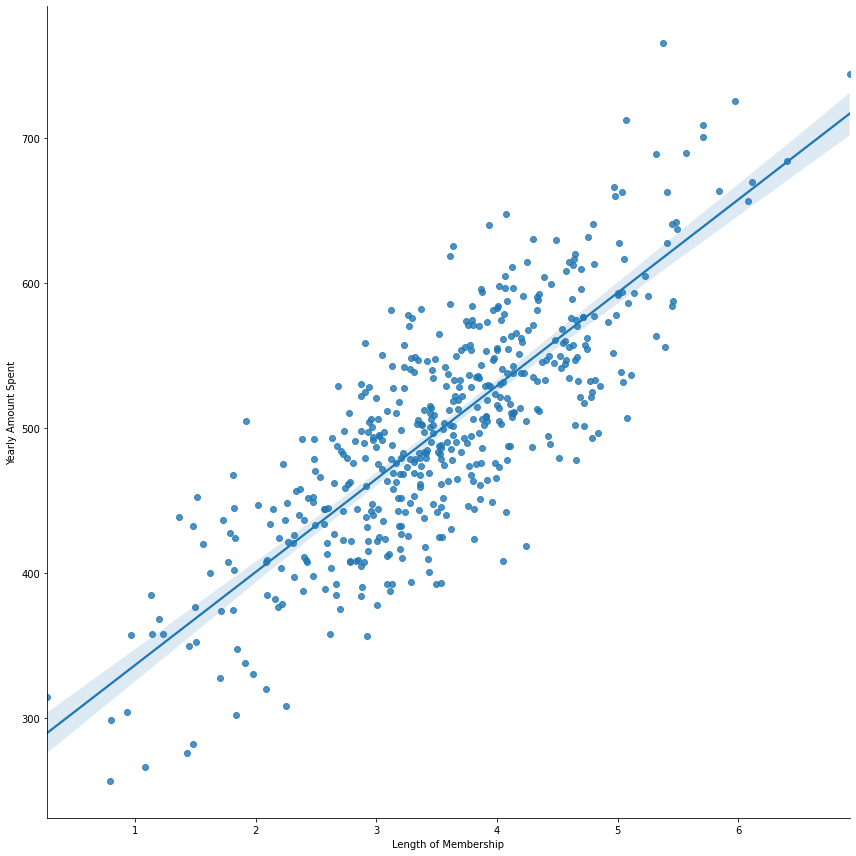

In [30]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=customers, height=12)
plt.tight_layout()

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

* X = Input Mtrix (numerical features of the customers) 
* y = output vector (In this case, 'Yearly Amount Spent')

### Separate the data into 'features values' and 'target values'

### X and y arrays

* **X array = features values  (Input Matrix)**
* **y array = target values  (Output Vector)**

In [31]:
# Check colums of DataFrame
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [32]:
# Define 'Input Matrix'
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [33]:
# Check 'Input Matrix'
# Dimension = 500x4
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [34]:
# Define the 'Output Vector'
y = customers['Yearly Amount Spent']

In [35]:
# Check our 'Output Vector'
# Dimension = 500x1
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [36]:
# import the 'train_test_split model' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

In [37]:
# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
# Data = (X, y)
# Training Data = (X_train, y_train)
# Testing Data = (X_test, y_test)
# test_size = 0.3 (30% of the whole data)
# random_state 101 (Specific set of random split on our data)

In [39]:
# Check 'training inputs matrix'
# Dimension: 350x4
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382
...,...,...,...,...
63,32.789773,11.670066,37.408748,3.414688
326,33.217188,10.999684,38.442767,4.243813
337,31.827979,12.461147,37.428997,2.974737
11,33.879361,11.584783,37.087926,3.713209


In [40]:
# Check 'training output vector'
# Dimension: 350x1
y_train

202    443.965627
428    556.298141
392    549.131573
86     487.379306
443    561.516532
          ...    
63     483.159721
326    505.230068
337    440.002748
11     522.337405
351    533.396554
Name: Yearly Amount Spent, Length: 350, dtype: float64

In [41]:
# Check 'test inputs matrix'
# Dimension: 150x4
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576
361,32.077590,10.347877,39.045156,3.434560
104,31.389585,10.994224,38.074452,3.428860
4,33.330673,12.795189,37.536653,4.446308
156,32.294642,12.443048,37.327848,5.084861
...,...,...,...,...
147,32.255901,10.480507,37.338670,4.514122
346,32.765665,12.506548,35.823467,3.126509
423,33.128693,10.398458,36.683393,3.859818
17,32.338899,12.013195,38.385137,2.420806


In [42]:
# Check 'test output matrix'
# Dimension: 150x1
y_test

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
          ...    
147    479.731938
346    488.387526
423    461.112248
17     407.704548
259    375.398455
Name: Yearly Amount Spent, Length: 150, dtype: float64

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [43]:
# Now import the 'LinearRegression' model from 'sklearn.linear_model'
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [44]:
# Now define the instances of the LinearRegression model
lm = LinearRegression() # creating a LinearRegression object

** Train/fit lm on the training data.**

In [45]:
# fit (train) my model on my training data
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients and intercept of the model**

In [46]:
# print the intercept
# intercep is the constant term of our hypothesis
print(lm.intercept_)

-1047.932782250239


In [47]:
# Now check the coefficients which are associated with each feature of the training data
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

**Now create a DataFrame based on these coefficients**

In [48]:
X_train.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [49]:
# Creating a DataFrame 'cdf' in which:
# data = lm.coef_
# indices = X_train.columns
# columns ['Parameters']

cdf = pd.DataFrame(lm.coef_, X_train.columns, columns = ['Parameters'])

In [50]:
# Now check our 'Parameter Vector'
# Dimension: 4x1
cdf

,Parameters
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** Create a scatterplot of the real test values versus the predicted values. **

In [51]:
# For pridictions we use the predict() method and pass X_test (test_set) as argument
# X_test Dimension: 350x4
# predictions Dimension: 150x1
predictions = lm.predict(X_test)

In [52]:
# Check the predictions
# 'predictions' will return predicted prices of the house according to our linear-fit-model.
# it will return an array which size of as input size (size of X_train)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

In [53]:
# Convert the predictions from array to Series
predicted_values = pd.Series(data = predictions)

In [54]:
# Check predicted_values
# Dimension: 150x1
predicted_values

0      456.441861
1      402.720053
2      409.253154
3      591.431034
4      590.014373
          ...    
145    478.300766
146    484.410296
147    457.590999
148    411.526576
149    375.479006
Length: 150, dtype: float64

In [55]:
# Check actual values of houses
# Dimension: 150x1
y_test

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
          ...    
147    479.731938
346    488.387526
423    461.112248
17     407.704548
259    375.398455
Name: Yearly Amount Spent, Length: 150, dtype: float64

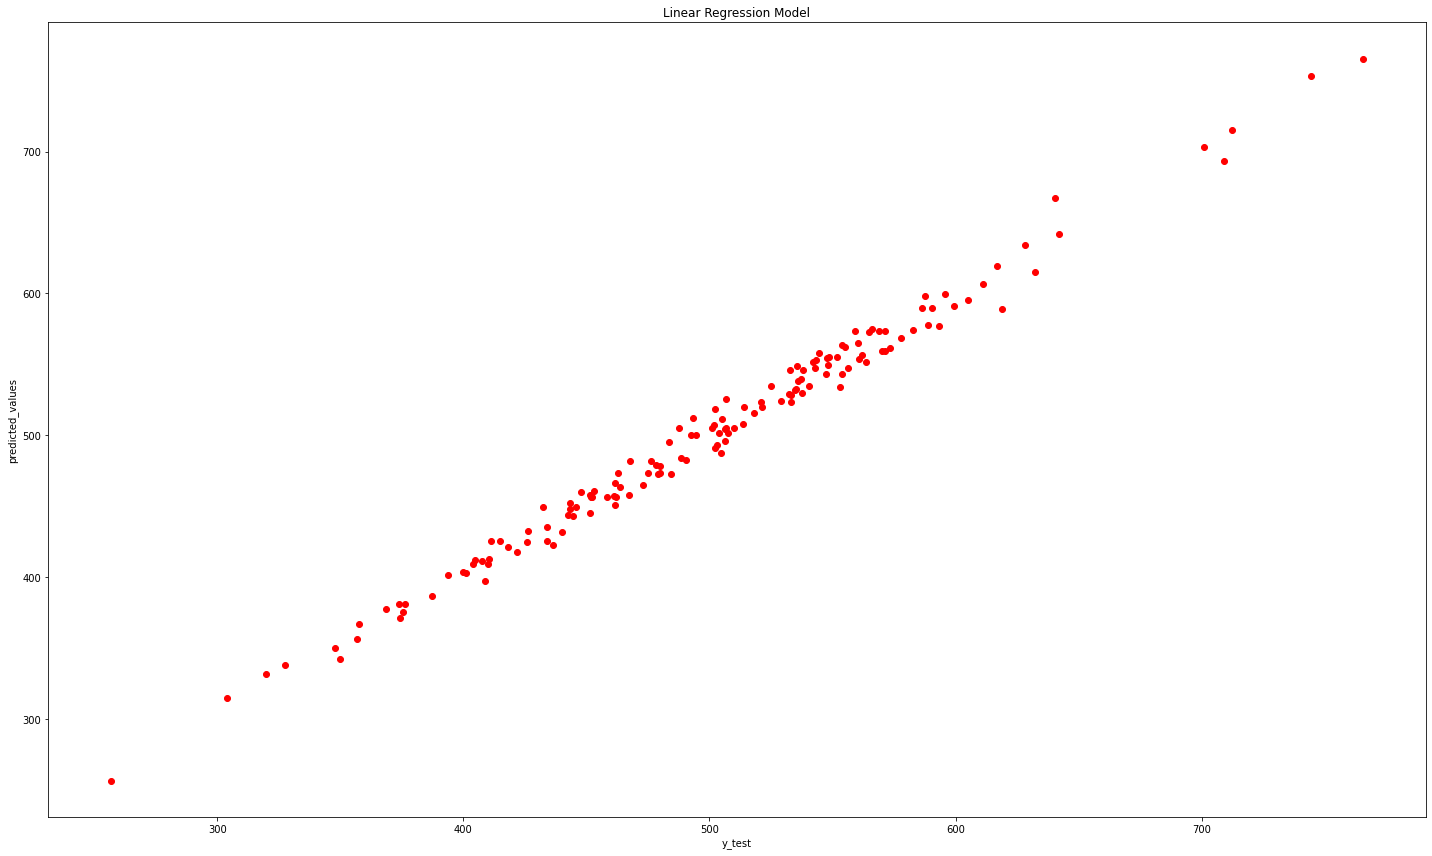

In [56]:
# Visualizing our predictions
# Draw a scatter plot between 'y_test' and 'predicted_values'
plt.figure(figsize=(20,12))
plt.xlabel('y_test')
plt.ylabel('predicted_values')
plt.title('Linear Regression Model')
plt.scatter(y_test, predicted_values, color='red')
plt.tight_layout()

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [57]:
# Import 'matrics' module from sklearn
from sklearn import metrics

In [58]:
# Now calulating errors
print('MAE:', metrics.mean_absolute_error(y_test, predicted_values)) # Mean absolute error
print('MSE:', metrics.mean_squared_error(y_test, predicted_values)) # Mean squared error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_values))) # Root mean squared error

MAE: 7.2281486534308295
MSE: 79.8130516509743
RMSE: 8.933815066978626


In [60]:
# Explained variance regression score function: Best possible score is 1.0, lower values are worse.
metrics.explained_variance_score(y_true=y_test, y_pred=predicted_values)

0.9890771231889607

In [61]:
accuracy = metrics.explained_variance_score(y_true=y_test, y_pred=predicted_values)
print("Our model is : ",accuracy * 100,"%", " accurate.")

Our model is :  98.90771231889607 %  accurate.


**To see the above score we can say that our model accuracy is = 99% (approx)**

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

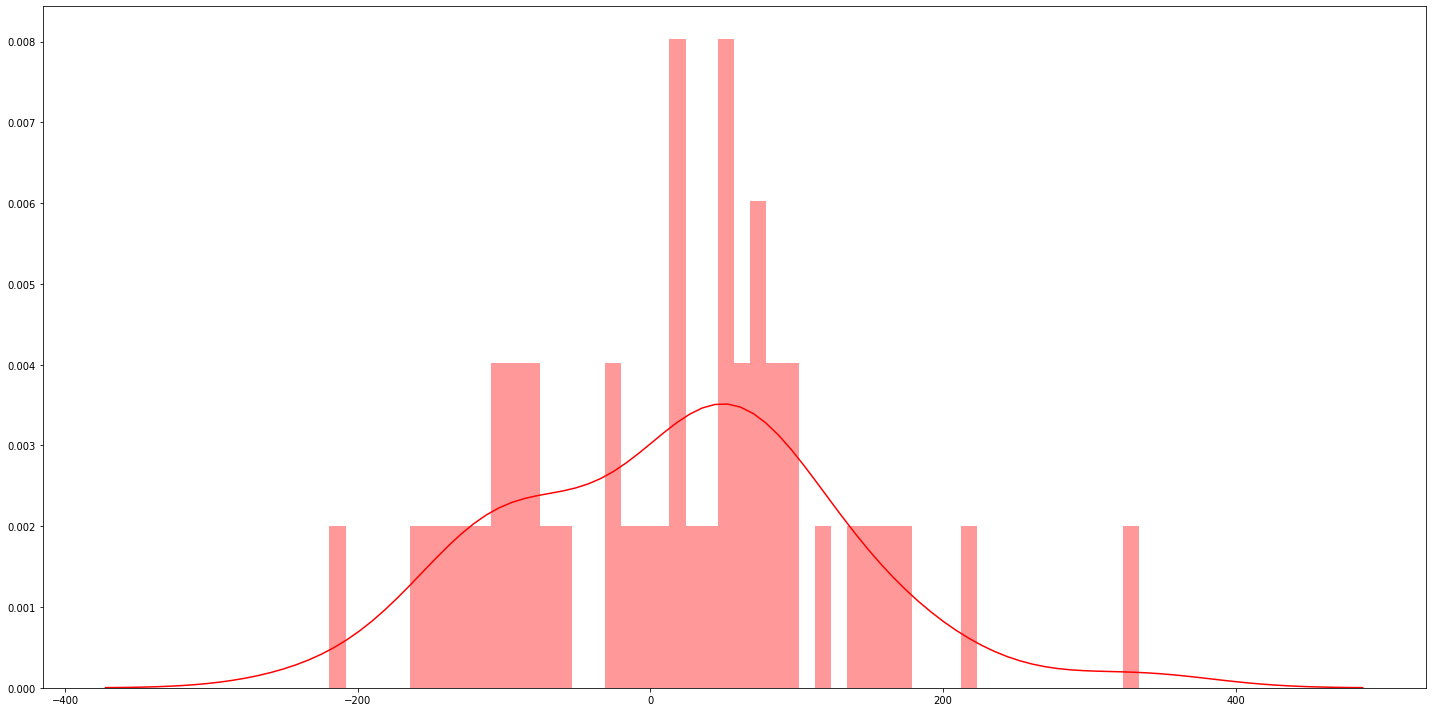

In [63]:
# Now we are going to create a histogram of the distribution of ore residues
# residues are the differnce between the actual values (y_test) and the predicted values (predicted_values)
residues = y_test - predicted_values # it will give the "absolute error"
plt.figure(figsize = (20,10))
sns.distplot((residues), bins=50, color='red')
plt.tight_layout()

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [64]:
# Creating a DataFrame 'cdf' in which:
# data = lm.coef_
# indices = X_train.columns
# columns ['Parameters']

cdf = pd.DataFrame(lm.coef_, X_train.columns, columns = ['Parameters'])

In [65]:
# Now check our 'Parameter Vector'
# Dimension: 4x1
cdf

,Parameters
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!


## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.